<a href="https://colab.research.google.com/github/mai0elkady/Boston_airbnb_data_analysis/blob/main/Boston_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to access the files I have
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import string 
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [ ]:
boston_airbnb_data_path = '/content/drive/MyDrive/UdacityND/project1/Boston_Airbnb/'

In [ ]:
calendar = pd.read_csv(boston_airbnb_data_path+'calendar.csv')
listings = pd.read_csv(boston_airbnb_data_path+'listings.csv')
reviews = pd.read_csv(boston_airbnb_data_path+'reviews.csv')

In [ ]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [ ]:
listings[['instant_bookable']].head()

,instant_bookable
0,f
1,t
2,f
3,f
4,f


In [ ]:
listings.head()
print(listings.columns)
smaller_listings = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','description', 'experiences_offered', 'neighborhood_overview',
       'notes','transit','access','interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name','host_location','host_picture_url', 'host_neighbourhood', 'host_verifications',
       'neighbourhood_group_cleansed', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact','bed_type', 'amenities','calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped','first_review', 'last_review', 
       'requires_license',
       'license', 'jurisdiction_names','calculated_host_listings_count','space'	, 'host_about','host_thumbnail_url','street'
       ,'weekly_price','monthly_price','cleaning_fee','square_feet','security_deposit','extra_people','city','state',
       'id','host_listings_count','neighbourhood_cleansed','reviews_per_month'],axis = 1)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [ ]:
pd.set_option('display.max_rows', None)
print("percent of missing values in each coloumn in listings")
display(smaller_listings.isnull().mean())

percent of missing values in each coloumn in listings


host_since                          0.000000
host_response_time                  0.131381
host_response_rate                  0.131381
host_acceptance_rate                0.131381
host_is_superhost                   0.000000
host_total_listings_count           0.000000
host_has_profile_pic                0.000000
host_identity_verified              0.000000
neighbourhood                       0.151464
zipcode                             0.010600
property_type                       0.000837
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.003905
bedrooms                            0.002789
beds                                0.002510
price                               0.000000
guests_included                     0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
number_of_reviews                   0.000000
review_scores_rating                0.226778
review_sco

In [ ]:
smaller_listings.dtypes


host_since                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_total_listings_count             int64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood                        object
zipcode                              object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
price                                object
guests_included                       int64
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews                     int64
review_scores_rating                float64
review_scores_accuracy          

In [ ]:
#separate listings features into categorical and quantitative
cat_df = smaller_listings.select_dtypes(include=['object'])
quant_df = smaller_listings.select_dtypes(include=['float64','int64'])

In [ ]:
print(cat_df.columns)

#price is not a categorical variable so we can remove the $ infront of the price and treat it as quatitative variable
#also remove the ,s in the price to convert it to float later
cat_df['price'] = cat_df['price'].apply(lambda val: val[1:].translate(str.maketrans('', '', string.punctuation)) if val[0]=='$' else NaN)
cat_df = cat_df.astype({'price': 'float64'})
quant_df['price'] = cat_df['price']
cat_df = cat_df.drop(['price'],axis = 1)



Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'zipcode', 'property_type',
       'room_type', 'price', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
 cat_df['host_response_rate']

0        NaN
1       100%
2       100%
3       100%
4       100%
5       100%
6        98%
7       100%
8       100%
9       100%
10       83%
11      100%
12      100%
13      100%
14       75%
15      100%
16      100%
17      100%
18      100%
19      100%
20      100%
21      100%
22      100%
23      100%
24       NaN
25      100%
26      100%
27      100%
28       60%
29      100%
30       95%
31      100%
32       NaN
33      100%
34      100%
35      100%
36      100%
37       98%
38       98%
39      100%
40      100%
41      100%
42      100%
43      100%
44       77%
45      100%
46      100%
47      100%
48      100%
49      100%
50      100%
51       90%
52       77%
53       NaN
54      100%
55      100%
56       50%
57      100%
58       93%
59       NaN
60      100%
61       70%
62      100%
63      100%
64      100%
65       71%
66       36%
67      100%
68       NaN
69      100%
70       73%
71       60%
72       NaN
73      100%
74       NaN
75       50%
76      100%

In [ ]:
#also host_response_rate	and host_acceptance_rate have % after them
quant_df['host_response_rate'] = cat_df['host_response_rate'].apply(lambda val: val[0:-1] if isinstance(val, float)==False else np.nan)
quant_df = quant_df.astype({'host_response_rate': 'float64'})
cat_df = cat_df.drop(['host_response_rate'],axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
quant_df['host_acceptance_rate'] = cat_df['host_acceptance_rate'].apply(lambda val: val[0:-1] if isinstance(val, float)==False else np.nan)
quant_df = quant_df.astype({'host_acceptance_rate': 'float64'})
cat_df = cat_df.drop(['host_acceptance_rate'],axis = 1)

In [ ]:
quant_df.dtypes
#[quant_df['host_response_rate'].notna()==True]

host_total_listings_count        int64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
guests_included                  int64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                          float64
host_response_rate             float64
host_acceptance_rate           float64
dtype: object

In [ ]:
#for the host_since variable, I want to calculate the number of years instead of using a date 
# and change that to be a quantitative variable too
cat_df['host_since'] =  pd.to_datetime(cat_df['host_since'], format='%Y-%m-%d')
quant_df['host_since_days'] = cat_df['host_since'].apply(lambda val: (date(2021,1,7)-date(val.year,val.month,val.day)).days if val else NaN)
cat_df = cat_df.drop(['host_since'], axis = 1)

In [ ]:
cat_df.dtypes

host_response_time                  object
host_is_superhost                   object
host_has_profile_pic                object
host_identity_verified              object
neighbourhood                       object
zipcode                             object
property_type                       object
room_type                           object
instant_bookable                    object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

In [ ]:
quant_df.dtypes

host_total_listings_count        int64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
guests_included                  int64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                          float64
host_response_rate             float64
host_acceptance_rate           float64
host_since_days                  int64
dtype: object

In [ ]:
#some coloumns have t,f for true and false, and I want to change them to bolean
for col in cat_df:
    if(len(cat_df[col].unique())<=3):
      unique_vals = sorted(cat_df[col].unique())
      if unique_vals[0] == 'f':
        cat_df[col] = cat_df[col].apply(lambda val: True if val=='t' else False)


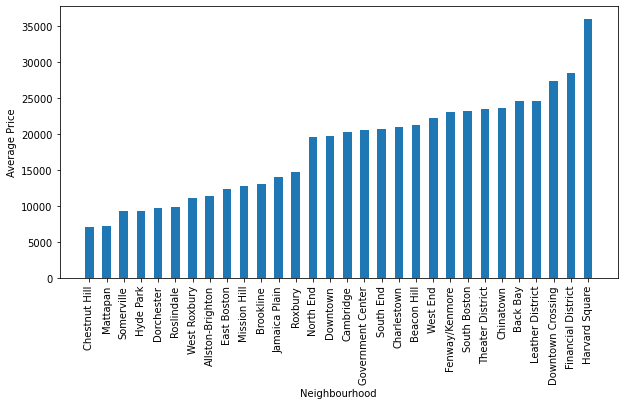

In [ ]:
#average neighbourhood prices
neighbourhood_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],'price':quant_df['price']})
average_price_in_neighbourhood = neighbourhood_df.groupby('neighbourhood').mean().reset_index()
average_price_in_neighbourhood = average_price_in_neighbourhood.sort_values(by=['price'])
orderd_neighbourhoods = average_price_in_neighbourhood['neighbourhood'] #to be used in next cell
plt.figure(1,(10,5))
plt.bar(average_price_in_neighbourhood['neighbourhood'],average_price_in_neighbourhood['price'],width = 0.5);
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=90);


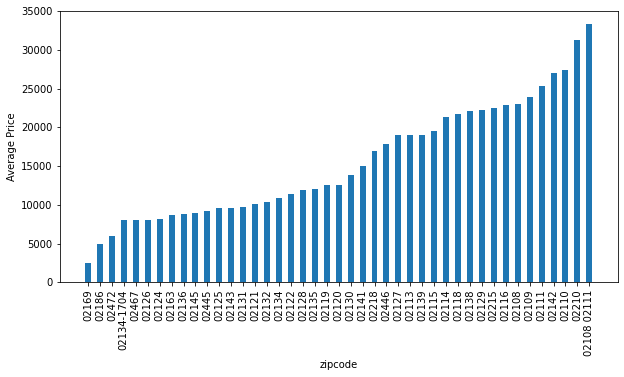

In [ ]:
#average zipcode prices
zipcode_df = pd.DataFrame({'zipcode':cat_df['zipcode'],'price':quant_df['price']})
average_price_in_zipcode = zipcode_df.groupby('zipcode').mean().reset_index()
average_price_in_zipcode = average_price_in_zipcode.sort_values(by=['price'])
plt.figure(2,(10,5))
plt.bar(average_price_in_zipcode['zipcode'],average_price_in_zipcode['price'],width = 0.5);
plt.xlabel("zipcode")
plt.ylabel("Average Price")
plt.xticks(rotation=90);

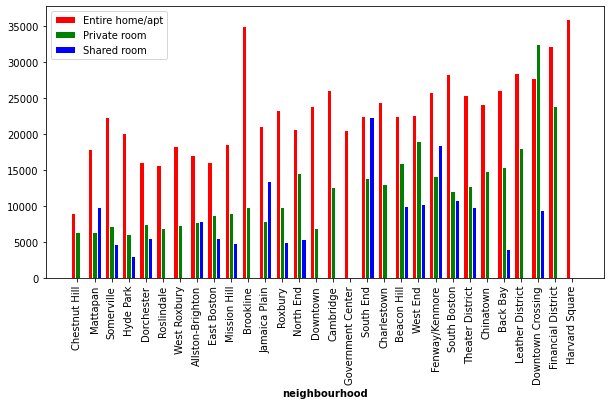

In [ ]:
#Do they neighbourhood offer larger rooms, study between the relationship of room_type and neighbourhood
neighbourhood_roomtype_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],
                                          'room_type':cat_df['room_type'],'price':quant_df['price']})
neighbourhood_roomtype_df = neighbourhood_roomtype_df.sort_values(by=['price'])
average_price_neighbour_rmtype = neighbourhood_roomtype_df.groupby(['neighbourhood','room_type']).mean().reset_index()

# set width of bar
barWidth = 0.25
bars = []
labels = average_price_neighbour_rmtype['room_type'].unique()
# set height of bar
neighbourhoods = average_price_neighbour_rmtype['neighbourhood'].unique()
i_s = len(neighbourhoods)
j_s = len(labels)
bars = np.ones((j_s,i_s))
for i,neighbourhood in enumerate(orderd_neighbourhoods):
  subset = average_price_neighbour_rmtype[average_price_neighbour_rmtype['neighbourhood'] == neighbourhood]
  for j,rm_type in enumerate(average_price_neighbour_rmtype['room_type'].unique()):
    #print(list(subset['room_type']))
    if(rm_type in list(subset['room_type'])):
      bars[j][i] = subset[subset['room_type']==rm_type]['price']
    else:
      bars[j][i] = 0
    

# Set position of bar on X axis
rs = np.ones((len(labels),len(bars[0])))
rs[0,:] = np.arange(len(bars[0]))
plt.figure(3,(10,5))
for i in range(1,len(labels)):
  rs[i,:] = [x + barWidth for x in rs[i-1,:]]
colors = ['r','g','b']
for i in range(0,len(labels)):
  plt.bar(rs[i,:], bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i])

# Add xticks on the middle of the group bars
plt.xlabel('neighbourhood', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars[0]))],list(orderd_neighbourhoods))
 
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90);
plt.show()

#if we were to arrange them by entire home/private room/ etc. we would get a different plot than before

In [ ]:
cat_df.head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,property_type,room_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,NaN,False,True,False,Roslindale,02131,House,Entire home/apt,False,moderate,False,False
1,within an hour,False,True,True,Roslindale,02131,Apartment,Private room,True,moderate,False,False
2,within a few hours,True,True,True,Roslindale,02131,Apartment,Private room,False,moderate,True,False
3,within a few hours,False,True,False,NaN,NaN,House,Private room,False,moderate,False,False
4,within an hour,True,True,True,Roslindale,02131,House,Private room,False,flexible,False,False


In [ ]:
quant_df.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,host_response_rate,host_acceptance_rate,host_since_days
0,1,4,1.5,2.0,3.0,1,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,NaN,NaN,2094
1,1,2,1.0,1.0,1.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,6500.0,100.0,100.0,3136
2,1,2,1.0,1.0,1.0,1,3,45,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,6500.0,100.0,88.0,4259
3,1,4,1.0,1.0,2.0,2,1,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,7500.0,100.0,50.0,2818
4,1,2,1.5,1.0,2.0,1,2,31,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,7900.0,100.0,100.0,2433


In [ ]:
#which part of the review affect your overall review the most!
#review, space, neighbourhood and price (how are they all related)
#new airbnb people, how much to charge for your room, based on space, neighbourhood and other factors

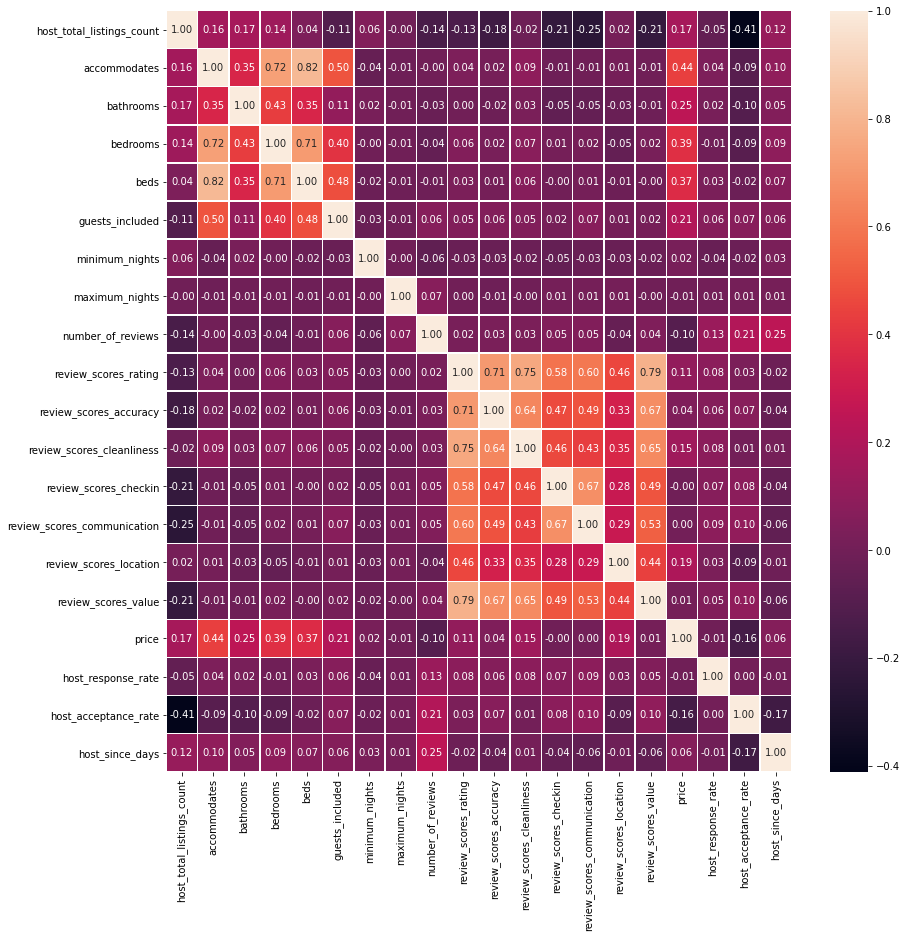

In [ ]:
# with the quantitative variables plot a heat map to identify how are variable correlated
fig, ax = plt.subplots(figsize=(14,14))         # Sample figsize in inches
sns.heatmap(quant_df.corr(),annot=True,fmt=".2f",linewidths=.5, ax=ax)

In [ ]:
#checking whether I can change variables into onehot encoded depending on how many unique values are there
# in each coloumn
sum_total_unique_vals = 0
for col in cat_df:
  print(col)
  unique_col_vals = cat_df[col].unique()
  print(len(unique_col_vals))
  print(unique_col_vals)
  sum_total_unique_vals+=len(unique_col_vals)
print(sum_total_unique_vals)
#cat_df['host_response_time'].unique()
# a total of 113 unique value,
# since neighbourhood and zipcode interlap, i will drop converting the zipcodes into festures
cat_df = cat_df.drop(columns=['zipcode'])

host_response_time
5
[nan 'within an hour' 'within a few hours' 'within a day'
 'a few days or more']
host_is_superhost
2
[False  True]
host_has_profile_pic
2
[ True False]
host_identity_verified
2
[False  True]
neighbourhood
31
['Roslindale' nan 'Jamaica Plain' 'Mission Hill' 'Fenway/Kenmore'
 'Back Bay' 'Leather District' 'Chinatown' 'Hyde Park' 'North End'
 'Roxbury' 'South End' 'Mattapan' 'East Boston' 'South Boston'
 'Charlestown' 'West End' 'Beacon Hill' 'Theater District'
 'Downtown Crossing' 'Downtown' 'Financial District' 'Government Center'
 'Allston-Brighton' 'West Roxbury' 'Chestnut Hill' 'Dorchester'
 'Brookline' 'Cambridge' 'Somerville' 'Harvard Square']
zipcode
44
['02131' nan '02130' '02119' '02120' '02115' '02215' '02116' '02111'
 '02109' '02113' '02110' '02114' '02108' '02121' '02118' '02125' '02124'
 '02210' '02218' '02142' '02128' '02129' '02145' '02126' '02108 02111'
 '02472' '02122' '02446' '02135' '02134' '02445' '02132' '02467' '02136'
 '02186' '02169' '02127' '

In [ ]:
cat_df_with_dummies = pd.get_dummies(cat_df,dummy_na=True)

In [ ]:
cat_df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   host_is_superhost                      3585 non-null   bool 
 1   host_has_profile_pic                   3585 non-null   bool 
 2   host_identity_verified                 3585 non-null   bool 
 3   instant_bookable                       3585 non-null   bool 
 4   require_guest_profile_picture          3585 non-null   bool 
 5   require_guest_phone_verification       3585 non-null   bool 
 6   host_response_time_a few days or more  3585 non-null   uint8
 7   host_response_time_within a day        3585 non-null   uint8
 8   host_response_time_within a few hours  3585 non-null   uint8
 9   host_response_time_within an hour      3585 non-null   uint8
 10  host_response_time_nan                 3585 non-null   uint8
 11  neighbourhood_Allston-Brighton

In [ ]:
all_data = pd.merge(cat_df_with_dummies,quant_df, left_index=True, right_index=True)

In [ ]:
n,d = len(all_data), len(all_data.columns)
print(n)
print(d)

3585
85


In [ ]:
def ridge_reg_training(X,y,alphas,random_seed,n_splits):
  np.random.seed(random_seed)
  random_ints =  np.random.randint(low=0,high=100,size=n_splits)
  avg_acc_scores = []
  avg_rss = []
  avg_diff = []
  for alpha in alphas:
    total_acc_score = 0
    rss = 0
    diff = 0
    for rand_int in random_ints:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_int)
      clf = Ridge(alpha=alpha).fit(X_train,y_train)
      #clf = LogisticRegression(random_state=random_seed, C=C, max_iter=200,penalty=penality,solver=solver).fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      abs_diff = np.abs(y_pred-y_test)
      diff += sum((abs_diff/y_test)*100)
      rss += sum((y_pred-y_test)**2)
      total_acc_score += clf.score(X_test, y_test)
    avg_acc_score = total_acc_score/n_splits
    avg_acc_scores.append(avg_acc_score)
    avg_rss.append(rss/n_splits)
    avg_diff.append(diff/n_splits)
    data = {'y_pred':y_pred, 'y_true': y_test, 'diff': abs_diff , 'percentage': (abs_diff/y_test)*100}
    data_df = pd.DataFrame(data)
    print(data_df.head())
  return avg_acc_scores,avg_rss,avg_diff


In [ ]:
def plot_r2_vs_alphas(avg_r2_scores,alphas):
  plt.figure()
  plt.plot(alphas,avg_r2_scores)
  plt.xlabel("Alpha Values")
  plt.ylabel("Average Scores")
  

3585
2520
            y_pred   y_true          diff  percentage
1407  -6648.723517   4000.0  10648.723517  266.218088
2249  18387.072765  23900.0   5512.927235   23.066641
2477  21661.924239  15500.0   6161.924239   39.754350
3288  24162.634727  22500.0   1662.634727    7.389488
1646  17900.571900   9900.0   8000.571900   80.813858
            y_pred   y_true         diff  percentage
1407  -4644.680844   4000.0  8644.680844  216.117021
2249  18415.815905  23900.0  5484.184095   22.946377
2477  21662.349285  15500.0  6162.349285   39.757092
3288  24166.266550  22500.0  1666.266550    7.405629
1646  17928.570266   9900.0  8028.570266   81.096669
            y_pred   y_true         diff  percentage
1407   4237.155146   4000.0   237.155146    5.928879
2249  18584.536888  23900.0  5315.463112   22.240431
2477  21668.334834  15500.0  6168.334834   39.795709
3288  24195.148708  22500.0  1695.148708    7.533994
1646  18102.038076   9900.0  8202.038076   82.848869
            y_pred   y_true   

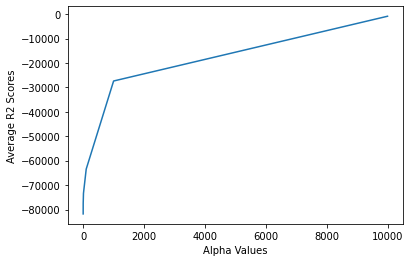

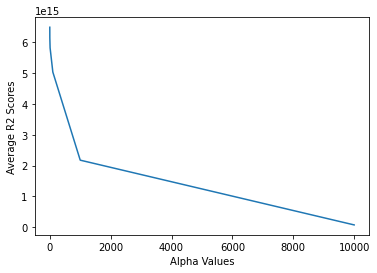

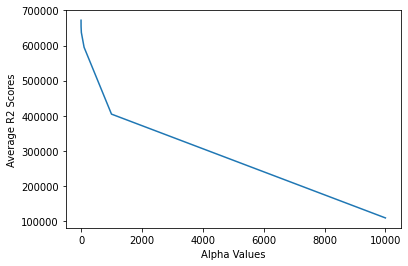

In [ ]:
print(len(all_data))
all_data_no_na = all_data.dropna(axis=0,how='any')
print(len(all_data_no_na))
y = all_data_no_na['price']
X = all_data_no_na.drop(columns=['price'])
alphas = [0.001, 0.1, 1, 10, 100, 1000, 10000]
random_seed = 42
n_splits = 1
avg_r2_scores, avg_rss, avg_diff = ridge_reg_training(X,y,alphas,random_seed,n_splits)
print(avg_r2_scores)
print(avg_rss)
print(avg_diff)
plot_r2_vs_alphas(avg_r2_scores,alphas)
plot_r2_vs_alphas(avg_rss,alphas)
plot_r2_vs_alphas(avg_diff,alphas)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X
y_train = y
X_test = X
y_test = y
#clf = Ridge(alpha=10000).fit(X_train,y_train)
#clf = LogisticRegression(random_state=random_seed, C=C, max_iter=200,penalty=penality,solver=solver).fit(X_train, y_train)
y_pred = clf.predict(X_test)
abs_diff = np.abs(y_pred-y_test)
data = {'y_pred':y_pred, 'y_true': y_test, 'diff': abs_diff , 'percentage': (abs_diff/y_test)*100}
data_df = pd.DataFrame(data)
print(data_df.head())
print(sum(data_df['percentage'])/len(y_test))

         y_pred  y_true          diff  percentage
1  13453.519736  6500.0   6953.519736  106.977227
2  16251.862115  6500.0   9751.862115  150.028648
3  20153.429912  7500.0  12653.429912  168.712399
4  14189.574712  7900.0   6289.574712   79.614870
5  13507.931630  7500.0   6007.931630   80.105755
48.75397668815298
